In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [6]:
# Machine Learning models does not understand words. So, we need to convert sentences into array of numbers.
# Here, we use CountVectorizer to perform the task.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Count Vectorizer
Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

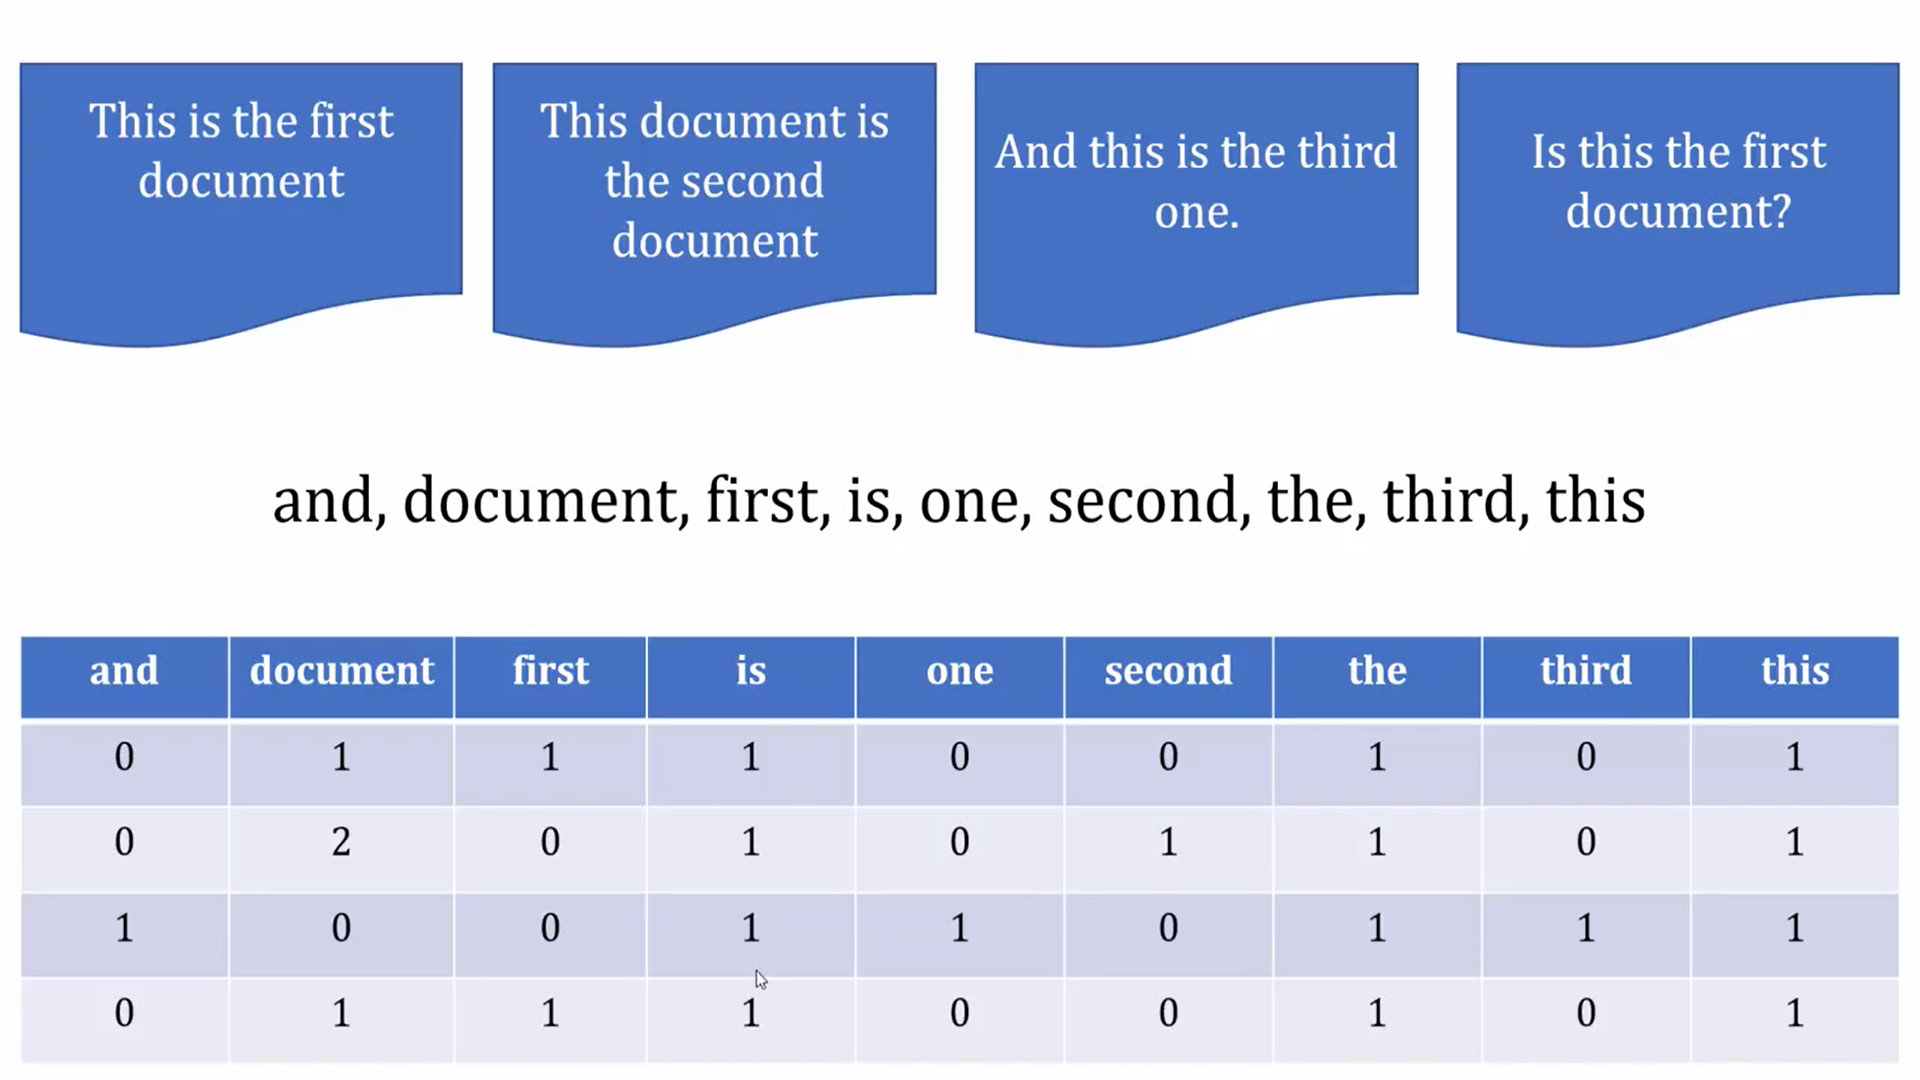

__Observations:__

    1.Unique words in the document, represented as columns of the table.
    2.Text samples in the document, each represented as rows of the table.
    3.Every cell contains a number, that represents the count of the word in that particular text.
    4.All words have been converted to lowercase.
    5.The words in columns have been arranged alphabetically.

## Types of Naive Bayes Classifier:
__Bernoulli Naive Bayes :__ It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

__Multinomial Naive Bayes :__ Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

__Gaussian Naive Bayes :__ Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [9]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [10]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9863603732950467

### Note: 
Instead of transforming and fitting CountVectorizer for train and test sets seperately, we can perform Pipelining.
## Pipelining : 
Sequentially apply a list of transforms and a final estimator. <br>
Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. <br> 
The final estimator only needs to implement fit. <br>
ie. acts a funtion that performs repeatitive fit and transform

In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
clf.score(X_test,y_test)

0.9863603732950467

In [14]:
clf.predict(emails)

array([0, 1], dtype=int64)